# 失業率和治安相關刑案之間的關聯性
之前常聽說當經濟不好，失業率高時，沒有工作的人變多，為了生計只好鋌而走險，所以會讓治安變差。以下我們將藉由民國92年到107年每月失業率和暴力犯罪、毒品犯罪與竊盜等治安相關刑案的回歸分析來看該假設是否屬實。

＊資料來源：內政部警政署統計資料網、中華民國統計資料網統計資料庫


In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import requests
import matplotlib as mpl      #在 matplotlib 中顯示中文
import matplotlib
matplotlib.matplotlib_fname()
mpl.rc('font', family='DejaVu Sans')
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
from sklearn.linear_model import LinearRegression            #線性迴歸

In [2]:
df = pd.read_csv('hw5.csv')
import locale     #修正有逗號的數字
locale.setlocale(locale.LC_NUMERIC, '')

unemp_t = df.iloc[1:192,2]                                             #總失業率
drug_t = df.iloc[1:192,3]                                                          #總毒品犯罪數
vio_t = df.iloc[1:192,4]                                                            #總暴力犯罪數
rob_t = df.iloc[1:192,5]                                                            #總竊盜率
df.head()



,年,月,失業率,總毒品犯罪數,暴力犯罪,竊盜率
0,92.0,1.0,5.03,2809.0,1322.0,120.53
1,92.0,2.0,5.17,1776.0,889.0,100.59
2,92.0,3.0,5.08,2157.0,1102.0,118.80
3,92.0,4.0,4.92,2372.0,1244.0,121.67
4,92.0,5.0,4.98,2144.0,1246.0,126.33


## 失業率和毒品犯罪的關聯性
從失業率和毒品犯罪的散布圖和回歸分析來看，可發現兩者是呈現負相關的，但是相關係數不高。

a= [[-439.81050176]]
b= [5757.32244772]
R2= 0.0769109860755609


Text(0,0.5,'Drug crime ')

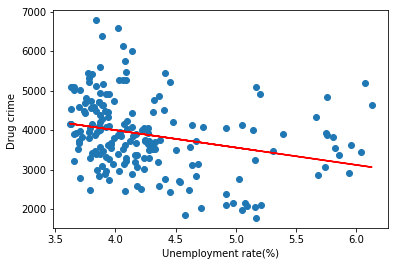

In [3]:
###回歸
plt.scatter(unemp_t, drug_t)
x=np.array(unemp_t)
y=np.array(drug_t)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Drug crime ')

## 失業率和暴力犯罪的關聯性
從失業率和暴力犯罪的散布圖和回歸分析來看，可發現兩者是呈現正相關的，但是相關係數不高。
而有趣的是，暴力犯罪可明顯區分成為兩群。依原始資料的時間來看，暴力犯罪數急速下降的時間點是在民國98年。因此我們再以民國98年為分界，來看兩群的相關係數。

a= [[159.62195273]]
b= [-164.92015969]
R2= 0.05964897003598291


Text(0,0.5,'Violence crime')

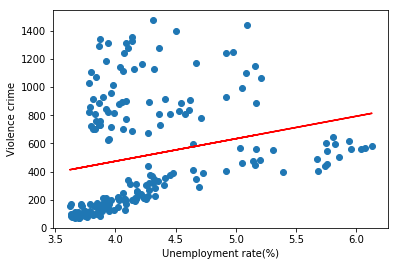

In [4]:
plt.scatter(unemp_t, vio_t)

x=np.array(unemp_t)
y=np.array(vio_t)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Violence crime')


a= [[90.44589996]]
b= [581.60331075]
R2= 0.026435406113390462
a= [[206.41707701]]
b= [-634.97625629]
R2= 0.8641196001540383


Text(0.5,1,'After 2009')

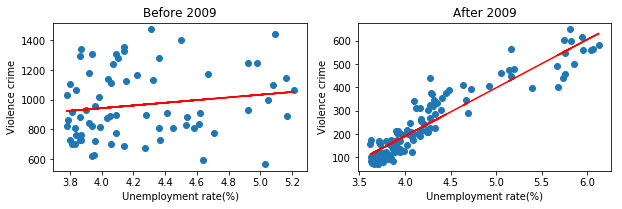

In [5]:
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
#民國98年前
unemp_bf98=df.iloc[1:72,2]                                             #總失業率
vio_bf98 = df.iloc[1:72,4]                                                     #總竊盜率
plt.scatter(unemp_bf98, vio_bf98)
x=np.array(unemp_bf98)
y=np.array(vio_bf98)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                      #印出斜率
print('b=', regr.intercept_ )               #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Violence crime')
plt.title('Before 2009')


plt.subplot(2,2,2)
#民國98年後
unemp_af98=df.iloc[73:192,2]  
vio_af98 = df.iloc[73:192,4]                                                     #總竊盜率
plt.scatter(unemp_af98, vio_af98)
x=np.array(unemp_af98)
y=np.array(vio_af98)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                      #印出斜率
print('b=', regr.intercept_ )               #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Violence crime')
plt.title('After 2009')


分成兩群後，我們可以看到民國98年後，雖然暴力犯罪數量相較前期減少許多，但失業率和暴力犯罪呈現顯著正相關，判定係數高達0.86。

## 失業率和竊盜率的關聯性
從失業率和竊盜率的散布圖和回歸分析來看，可發現兩者是呈現正相關的，但是相關係數不高。
而竊盜率也和暴力犯罪一樣，可明顯區分成為兩群。依原始資料的時間來看，竊盜率急速下降的時間點也正好是在民國98年。因此我們再以民國98年為分界，來看兩群的相關係數。

a= [[15.5483417]]
b= [-7.4041007]
R2= 0.057380166582379766


Text(0,0.5,'Robery')

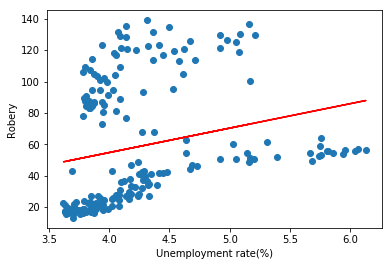

In [6]:
plt.scatter(unemp_t, rob_t)
x=np.array(unemp_t)
y=np.array(rob_t)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Robery')




a= [[18.99685359]]
b= [24.29432981]
R2= 0.15543607298159356
a= [[17.97975178]]
b= [-45.35775187]
R2= 0.7992244877352646


Text(0.5,1,'After 2009')

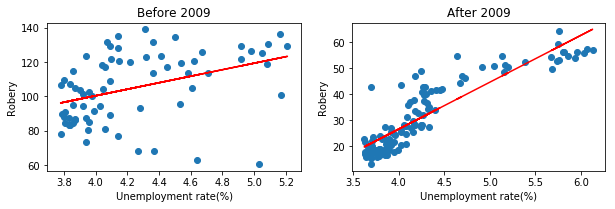

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
#民國98年前
unemp_bf98=df.iloc[1:72,2]                                             #總失業率
rob_bf98 = df.iloc[1:72,5]                                                     #總竊盜率
plt.scatter(unemp_bf98, rob_bf98)
x=np.array(unemp_bf98)
y=np.array(rob_bf98)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                      #印出斜率
print('b=', regr.intercept_ )               #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Robery')
plt.title('Before 2009')

plt.subplot(2,2,2)
#民國98年後
unemp_af98=df.iloc[73:192,2]  
rob_af98 = df.iloc[73:192,5]                                                     #總竊盜率
plt.scatter(unemp_af98, rob_af98)
x=np.array(unemp_af98)
y=np.array(rob_af98)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                      #印出斜率
print('b=', regr.intercept_ )               #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Unemployment rate(%)')
plt.ylabel('Robery')
plt.title('After 2009')

分成兩群後，我們可以看到民國98年後，失業率和竊盜率有顯著正相關，判定係數高達0.8。

從上面的回歸分析結果來看，可以發現失業率和毒品犯罪率關係不大。但是在民國98年後，失業率提高明顯增加了暴力犯罪和竊盜率。